## Assignment Four

Completion requirements

Food Delivery Cost and Profitability Analysis: Process We Can Follow

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

In [1]:
import io
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\Davie\Documents\GitHub\ML_MachineLearning\MSTA1106_StatsDataScience\assignment_4


1. Start by gathering comprehensive data related to all aspects of food delivery operations.

In [3]:
# create data path
data_path = os.path.join(cwd, 'foodorder_dataset.csv')
# load dataframe
food_orders=pd.read_csv(data_path)
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


2. Clean the dataset for inconsistencies, missing values, or irrelevant information.

In [4]:
# check shape
food_orders.shape

(1000, 12)

In [5]:
food_orders.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [6]:
# create dictionary
col_dict={
    'Order ID': 'order_id', 
    'Customer ID':'customer_id', 
    'Restaurant ID' : 'restaurant_id', 
    'Order Date and Time' : 'order_date',
    'Delivery Date and Time' : 'delivery_date', 
    'Order Value': 'order_value', 
    'Delivery Fee': 'delivery_fee',
    'Payment Method': 'payment_methods', 
    'Discounts and Offers': 'discounts_and_offers', 
    'Commission Fee': 'commission_fee',
    'Payment Processing Fee': 'processsing_fee', 
    'Refunds/Chargebacks': 'refunds_chargebacks'
}

In [7]:
food_orders = food_orders.rename(columns=col_dict)

In [8]:
food_orders.head(1)

,order_id,customer_id,restaurant_id,order_date,delivery_date,order_value,delivery_fee,payment_methods,discounts_and_offers,commission_fee,processsing_fee,refunds_chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0


In [9]:
# info
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              1000 non-null   int64 
 1   customer_id           1000 non-null   object
 2   restaurant_id         1000 non-null   object
 3   order_date            1000 non-null   object
 4   delivery_date         1000 non-null   object
 5   order_value           1000 non-null   int64 
 6   delivery_fee          1000 non-null   int64 
 7   payment_methods       1000 non-null   object
 8   discounts_and_offers  815 non-null    object
 9   commission_fee        1000 non-null   int64 
 10  processsing_fee       1000 non-null   int64 
 11  refunds_chargebacks   1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [10]:
# order_id should be object
food_orders['order_id']=food_orders['order_id'].astype(str)
food_orders['order_date']=pd.to_datetime(food_orders['order_date'])
food_orders['delivery_date']=pd.to_datetime(food_orders['delivery_date'])

In [11]:
# check dtype
food_orders.dtypes

order_id                        object
customer_id                     object
restaurant_id                   object
order_date              datetime64[ns]
delivery_date           datetime64[ns]
order_value                      int64
delivery_fee                     int64
payment_methods                 object
discounts_and_offers            object
commission_fee                   int64
processsing_fee                  int64
refunds_chargebacks              int64
dtype: object

In [12]:
# check categories on payment methods
food_orders['payment_methods'].unique()

array(['Credit Card', 'Digital Wallet', 'Cash on Delivery'], dtype=object)

In [13]:
# check missing values
food_orders.isna().sum()

order_id                  0
customer_id               0
restaurant_id             0
order_date                0
delivery_date             0
order_value               0
delivery_fee              0
payment_methods           0
discounts_and_offers    185
commission_fee            0
processsing_fee           0
refunds_chargebacks       0
dtype: int64

In [14]:
# get proportion of missing values
food_orders.isna().sum()/food_orders.shape[0]

order_id                0.000
customer_id             0.000
restaurant_id           0.000
order_date              0.000
delivery_date           0.000
order_value             0.000
delivery_fee            0.000
payment_methods         0.000
discounts_and_offers    0.185
commission_fee          0.000
processsing_fee         0.000
refunds_chargebacks     0.000
dtype: float64

In [15]:
# fill discount and offers with 0
food_orders['discounts_and_offers'] = food_orders['discounts_and_offers'].fillna(0)

In [16]:
# check categories on payment methods
food_orders['discounts_and_offers'].unique()

array(['5% on App', '10%', '15% New User', 0, '50 off Promo'],
      dtype=object)

In [17]:
# Create numeric column for discounts and offers
food_orders['discount'] = np.where(
    food_orders['discounts_and_offers'].str.contains("%", na=False),
    food_orders['discounts_and_offers'].str.extract(r'(\d+)')[0].astype(float),
    np.where(
        food_orders['discounts_and_offers'].str.contains("off", case=False, na=False),
        food_orders['discounts_and_offers'].str.extract(r'(\d+)')[0].astype(float),
        0
    )
)
food_orders.drop(columns='discounts_and_offers', inplace=True)

In [18]:
food_orders.head()

,order_id,customer_id,restaurant_id,order_date,delivery_date,order_value,delivery_fee,payment_methods,commission_fee,processsing_fee,refunds_chargebacks,discount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,10.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,15.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.0


In [19]:
# recheck missing values
food_orders.isna().sum()

order_id               0
customer_id            0
restaurant_id          0
order_date             0
delivery_date          0
order_value            0
delivery_fee           0
payment_methods        0
commission_fee         0
processsing_fee        0
refunds_chargebacks    0
discount               0
dtype: int64

In [20]:
# remove duplicates and create clean dataset
food_clean_df=food_orders.drop_duplicates()

3. Find the most common payment method. What is the proportion of the most common payment method?

In [21]:
pay = food_clean_df['payment_methods'].value_counts(normalize=True)

most_common = pay.idxmax()  
proportion = pay.max()

print(f'The most common payment method is {most_common.upper()}. \nThe proportion of the most common payment method is {proportion}')

The most common payment method is CASH ON DELIVERY. 
The proportion of the most common payment method is 0.357


4. Find 95% confidence interval of the proportion of the most common payment method

In [22]:
# most common payment method and proportion
p_hat = pay.max()
n = food_clean_df.shape[0]

# 95% confidence interval
z = 1.96
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print(f'Proportion of most common payment method: {p_hat:.4f} \n95% CI: ({ci_lower:.4f}, {ci_upper:.4f})')

Proportion of most common payment method: 0.3570 
95% CI: (0.3273, 0.3867)


5. Determine the average and the median commission fee

In [23]:
# mean
avg=food_clean_df['commission_fee'].mean()
# median
med=food_clean_df['commission_fee'].median()
print(f'The average of commission fee is {avg} \nThe median of commission fee is {med}')

The average of commission fee is 126.99 
The median of commission fee is 127.0


6. Find the average order value of customer

In [24]:
avg_order=food_clean_df['order_value'].mean()
avg_order

1053.969

7. Find the probability that a commission fee is

i). More than 120

ii). Less than 143 

iii). Between 86 and 133

In [25]:
# get mean and std of commission fee
mu = food_orders['commission_fee'].mean()
sigma = food_orders['commission_fee'].std()

In [26]:
# (i) P(X > 120)
p_more_120 = 1 - stats.norm.cdf(120, loc=mu, scale=sigma)
print(f'P(X > 120) = {p_more_120:.4f}')

P(X > 120) = 0.5645


In [27]:
# (ii) P(X < 143)
p_less_143 = stats.norm.cdf(143, loc=mu, scale=sigma)
print(f'P(X < 143) = {p_less_143:.4f}')

P(X < 143) = 0.6450


In [28]:
# (iii) P(86 < X < 133)
p_between = stats.norm.cdf(133, loc=mu, scale=sigma) - stats.norm.cdf(86, loc=mu, scale=sigma)
print(f'P(86 < X < 133) = {p_between:.4f}')

P(86 < X < 133) = 0.3849


8. Fine the average delivery time of the orders done by the credit card

In [29]:
# create delivery time in minutes
food_clean_df['delivery_time']=(food_clean_df['delivery_date']-food_clean_df['order_date']).dt.total_seconds() / 60
food_clean_df.head()

,order_id,customer_id,restaurant_id,order_date,delivery_date,order_value,delivery_fee,payment_methods,commission_fee,processsing_fee,refunds_chargebacks,discount,delivery_time
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,5.0,88.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,10.0,35.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,15.0,58.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.0,46.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.0,89.0


In [30]:
# filter credit cards
credit=food_clean_df[food_clean_df['payment_methods']=='Credit Card']

In [31]:
# get average
avg_delivery_time=credit['delivery_time'].mean()
print(f'The average delivery time of the orders done by the credit card is {avg_delivery_time:.2f} minutes')

The average delivery time of the orders done by the credit card is 74.01 minutes


9. What is the lowest order value of 10% largest orders done by Cash on delivery?

In [32]:
# find cutoff for the top 10 percent
cash=food_clean_df[food_clean_df['payment_methods']=="Cash on Delivery"]
cutoff = cash['order_value'].quantile(0.9)

In [33]:
# get min of top 10 order values
top_10_orders_min = cash[cash['order_value'] >= cutoff]['order_value'].min()
top_10_orders_min

1809

10. What is the highest order value of 60% least orders done by Digital Wallet?

In [34]:
# get 60 percent of least order values
wallet=food_clean_df[food_clean_df['payment_methods']=="Digital Wallet"]
cutoff=wallet['order_value'].quantile(0.6)

In [35]:
# get max order value
highest_order = wallet[wallet['order_value'] <= cutoff]['order_value'].max()
highest_order

1187

11. By what amount is the mean value by Digital Wallet more or less than that of Cash on delivery?

In [36]:
# mean for cash
cash_on_delivery=cash['order_value'].mean()
# mean for wallet
digital_wallet=wallet['order_value'].mean()
diff_wallet_cash=digital_wallet - cash_on_delivery
# if statement to return desired answer
if diff_wallet_cash<0:
    print(f'The mean value of Digital Wallet is less than that of Cash on delivery by {abs(diff_wallet_cash):.4f}')
else:
    print(f'The mean value of Digital Wallet is more than that of Cash on delivery by {diff_wallet_cash:.4f}')

The mean value of Digital Wallet is less than that of Cash on delivery by 9.9767


12. The delivery time for any item will take more than 53 minutes. Using a significance level of 0.05, prove or disapprove this claim.

Define hypotheses

- Null hypothesis (H₀): mu <= 53 (mean delivery time is at most 53 minutes)
- Alternative hypothesis (H₁): mu > 53 (mean delivery time is greater than 53 minutes)

In [37]:
# sample data
delivery_times = food_clean_df['delivery_time']
# hypothesized mean
mu0 = 53

# one-sample t-test
t_stat, p_two_sided = stats.ttest_1samp(delivery_times, mu0)

In [38]:
# since we want one-sided greater than 53
if t_stat > 0:
    p_val_one_sided = p_two_sided / 2
else:
    p_val_one_sided = 1 - (p_two_sided / 2)

print(f't-statistic: {t_stat} \none-sided p-value: {p_val_one_sided}')

t-statistic: 25.010005535385886 
one-sided p-value: 6.854686967539162e-108


In [39]:
alpha = 0.05
if p_val_one_sided < alpha:
    print('Reject H0: There is enough evidence that mean delivery time is greater than 53 min at 0.05 level.')
else:
    print('Fail to reject H0: There is not enough evidence that mean delivery time is greater 53 min at 0.05 level.')

Reject H0: There is enough evidence that mean delivery time is greater than 53 min at 0.05 level.


13. What is the range within which the middle 50% ordering-delivery durations differ?

- The middle 50% of the data lies between the lower quartile Q1) and the upper quartile (Q3)

In [40]:
q1 = food_clean_df['delivery_time'].quantile(0.25)
q3 = food_clean_df['delivery_time'].quantile(0.75)
# range within which the middle 50% lie
print(f'The middle 50% of delivery durations lie between {q1:.2f} and {q3:.2f} minutes.')

The middle 50% of delivery durations lie between 50.00 and 96.00 minutes.


In [41]:
# iqr
iqr=q3-q1
iqr

46.0

14. Find the distribution of various payment methods whose Refunds/Chargebacks is more than zero

In [42]:
# filter refunds_chargebacks more than zero
refund_greater_0=food_clean_df[food_clean_df['refunds_chargebacks']>0]
refund_greater_0['payment_methods'].unique()

array(['Cash on Delivery', 'Digital Wallet', 'Credit Card'], dtype=object)

In [43]:
# distribution of payment methods by counts
payment_dist_counts=refund_greater_0['payment_methods'].value_counts()
payment_dist_counts

payment_methods
Credit Card         102
Cash on Delivery    101
Digital Wallet       82
Name: count, dtype: int64

In [44]:
# distribution of payment methods by percentages
payment_dist_percent=refund_greater_0['payment_methods'].value_counts(normalize=True) * 100
payment_dist_percent

payment_methods
Credit Card         35.789474
Cash on Delivery    35.438596
Digital Wallet      28.771930
Name: proportion, dtype: float64

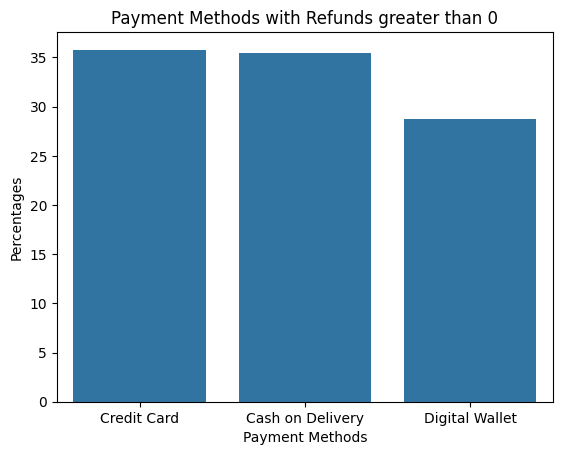

In [45]:
# visualize the distributions
sns.barplot(data=payment_dist_percent.reset_index(), x='payment_methods', y='proportion')

plt.title('Payment Methods with Refunds greater than 0')
plt.ylabel('Percentages')
plt.xlabel('Payment Methods')
plt.show();